In [2]:
import numpy as np
import matplotlib.pyplot as plt
import myplotlib
import myplotlib.plots as myplt
from astropy.io import fits
import pandas as pd

myplotlib.load('hershey')

In [57]:
hdul = fits.open('gll_psc_v30.fit')

In [63]:
hdul.info()

Filename: gll_psc_v30.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    456   6659R x 79C   [18A, I, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8E, 16E, 8E, 8E, E, E, E, E, E, E, D, E, 12E, 24E, 12E, 18A, 18A, 18A, 18A, 18A, 18A, A, 30A, 5A, 10A, 28A, 28A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     76   78R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    127   1988R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     55   19R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     56   20R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     23   13R x 1C   [D]   
  7  GTI           1 BinTableHDU     37   69107R x 2C   [D, D]   


In [99]:
data['Flux_Band']

array([[1.7739895e-08, 1.7370605e-13, 3.5739586e-10, ..., 6.7655547e-12,
        1.3150337e-15, 1.7826393e-16],
       [1.1467303e-10, 1.7143046e-11, 3.8459316e-10, ..., 9.4771501e-15,
        3.8819824e-16, 4.9146895e-16],
       [1.5116805e-11, 7.2035499e-16, 1.8061178e-12, ..., 7.5647804e-12,
        7.6611740e-18, 3.0044429e-13],
       ...,
       [1.6708242e-08, 8.8178631e-10, 5.1390470e-10, ..., 2.3130602e-15,
        8.4254727e-16, 1.0658633e-17],
       [4.9054998e-14, 2.5630337e-10, 4.9384513e-10, ..., 8.4248051e-12,
        2.0186199e-12, 1.1912511e-15],
       [4.5880180e-09, 2.1326883e-13, 1.0989605e-10, ..., 1.4774791e-11,
        5.8507422e-12, 1.1779537e-12]], dtype=float32)

In [98]:
data = hdul[1].data
cols = hdul[1].columns.names
data = {k: data[k] for k in cols}
# data_Fermi = {}
# data_Fermi = data[data['CLASS1'].str.contains('PSR')]

In [78]:
data = hdul[1].data
cols = hdul[1].columns.names
data = pd.DataFrame({k: data[k] for k in cols if len(data[k].shape) == 1})
data_Fermi = data[data["CLASS1"].str.contains("PSR")]
data_Fermi["Name"] = data_Fermi["ASSOC1"].str.replace("PSR ", "").str.strip()

cols = ["Name", "P0", "dP0", "P1", "dP1", "Dist", "Edot", "Bsurf"]
data = np.loadtxt(
    "psrcat.csv",
    delimiter=";",
    dtype=str,
    usecols=(3, 5, 6, 8, 9, 11, 12, 13),
    converters={3: lambda s: s.strip()},
)[2:]
data_psrcat = pd.DataFrame(data, columns=cols)
data_psrcat = data_psrcat[(data_psrcat["P0"] != "*") & (data_psrcat["P1"] != "*")]

# data_Fermi = pd.merge(data_Fermi, data_psrcat, on='Name')

/tmp/ipykernel_1766/2976208877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Fermi['Name'] = data_Fermi['ASSOC1'].str.replace('PSR ', '').str.strip()


In [83]:
data_Fermi.columns

Index(['Source_Name', 'DataRelease', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT',
       'Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_68_PosAng',
       'Conf_95_SemiMajor', 'Conf_95_SemiMinor', 'Conf_95_PosAng', 'ROI_num',
       'Extended_Source_Name', 'Signif_Avg', 'Pivot_Energy', 'Flux1000',
       'Unc_Flux1000', 'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType',
       'PL_Flux_Density', 'Unc_PL_Flux_Density', 'PL_Index', 'Unc_PL_Index',
       'LP_Flux_Density', 'Unc_LP_Flux_Density', 'LP_Index', 'Unc_LP_Index',
       'LP_beta', 'Unc_LP_beta', 'LP_SigCurv', 'LP_EPeak', 'Unc_LP_EPeak',
       'PLEC_Flux_Density', 'Unc_PLEC_Flux_Density', 'PLEC_IndexS',
       'Unc_PLEC_IndexS', 'PLEC_ExpfactorS', 'Unc_PLEC_ExpfactorS',
       'PLEC_Exp_Index', 'Unc_PLEC_Exp_Index', 'PLEC_SigCurv', 'PLEC_EPeak',
       'Unc_PLEC_EPeak', 'Npred', 'Variability_Index', 'Frac_Variability',
       'Unc_Frac_Variability', 'Signif_Peak', 'Flux_Peak', 'Unc_Flux_Peak',
       'Time_Peak', 'Peak_Interval'

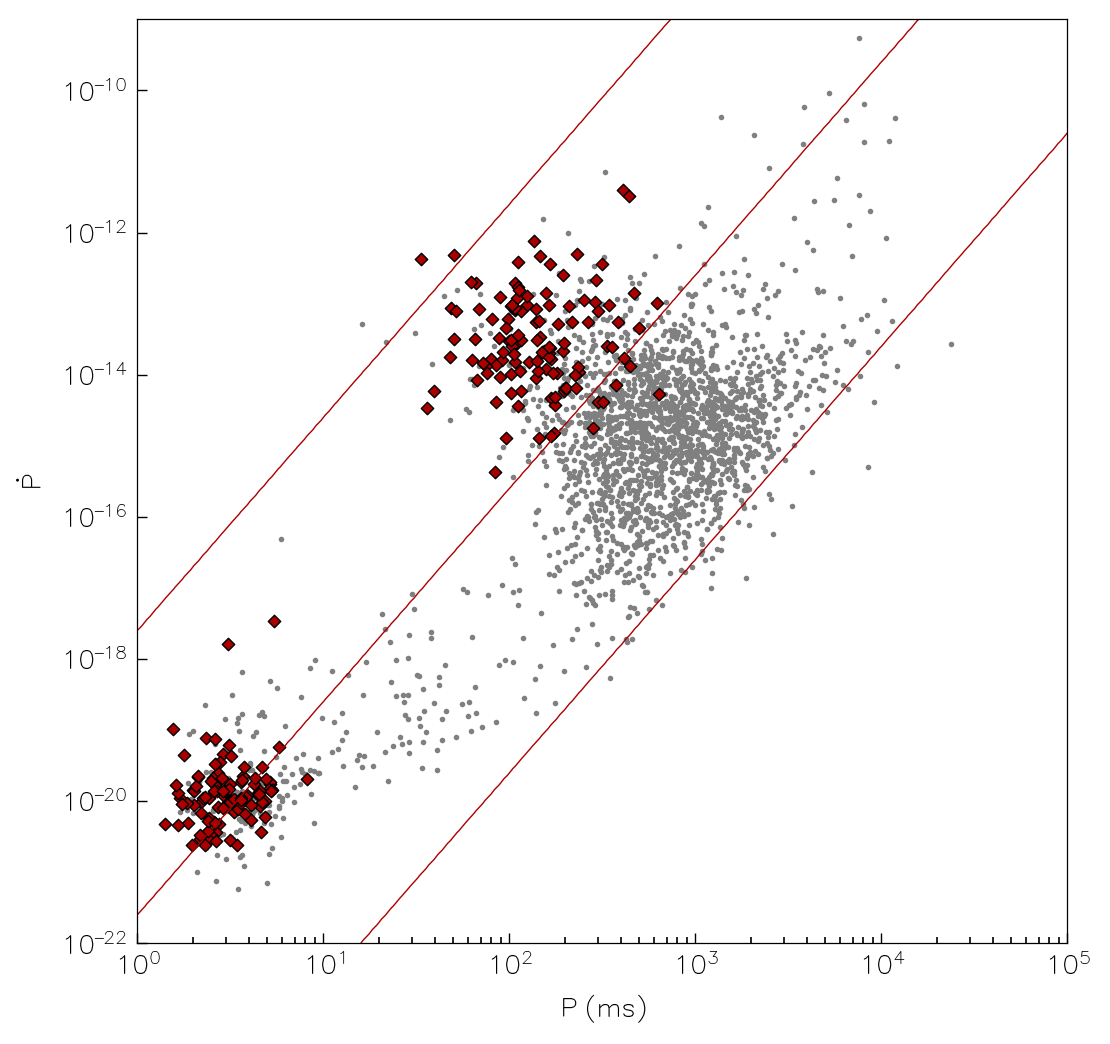

In [5]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=200)

ax.scatter(data_psrcat['P0'].astype(float) *
           1000, data_psrcat['P1'].astype(float),
           s=1, c='gray')

ax.scatter(data_Fermi['P0'].astype(float) *
           1000, data_Fermi['P1'].astype(float),
           c='C1', s=10, marker='D', ec='k', lw=0.5)
ax.set(ylim=(1e-22, 1e-9), xlim=(1, 1e5), 
       xscale='log', yscale='log',
       xlabel=r'$P$ (ms)', ylabel=r'$\dot{P}$');

x = np.logspace(np.log10(1), np.log10(1e5), 100)
y = np.logspace(np.log10(1e-22), np.log10(1e-9), 100)
x, y = np.meshgrid(x, y)
z = 4 * np.pi**2 * 1e45 * y / (x / 1e3)**3
ax.contour(x, y, z, levels=[1e30, 1e34, 1e38], colors='C1')